In [10]:
import numpy as np
import matplotlib.pyplot as plt
from stl import mesh

In [13]:
from skimage import measure

In [15]:
# generating mask as z<= x**2 + y**2 < 1.5z
x=y=np.linspace(-1,1,100)
z=np.linspace(0,0.5,100)
x2d,y2d=np.meshgrid(x,y,indexing='xy')
x3d,y3d,z3d=np.meshgrid(x,y,z,indexing='xy')

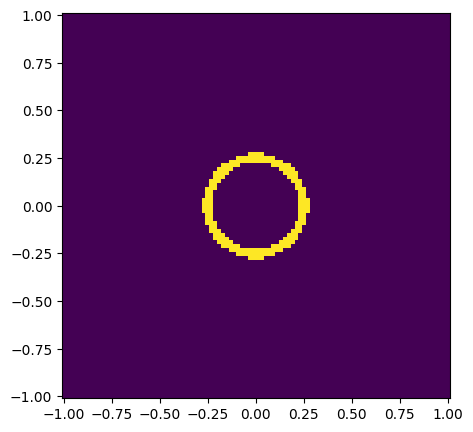

In [24]:
#create a mask
mask = (x3d**2 + y3d**2 >= z3d) * (x3d**2 + y3d**2 <= 1.5*z3d)
plt.figure(figsize=(5,5))
plt.pcolormesh(x2d,y2d,mask[:,:,10])

In [25]:
verts, faces, normals, values = measure.marching_cubes(mask)

In [27]:
# create 3d object (mesh) out of faces and vertices
faces.shape

(101496, 3)

In [31]:
obj_3d=mesh.Mesh(np.zeros(faces.shape[0],dtype=mesh.Mesh.dtype))
# loop through all faces
for i,f in enumerate(faces): # 3 vecctors
    obj_3d.vectors[i]=verts[f]
obj_3d.save('3d_file_outofmask.stl')

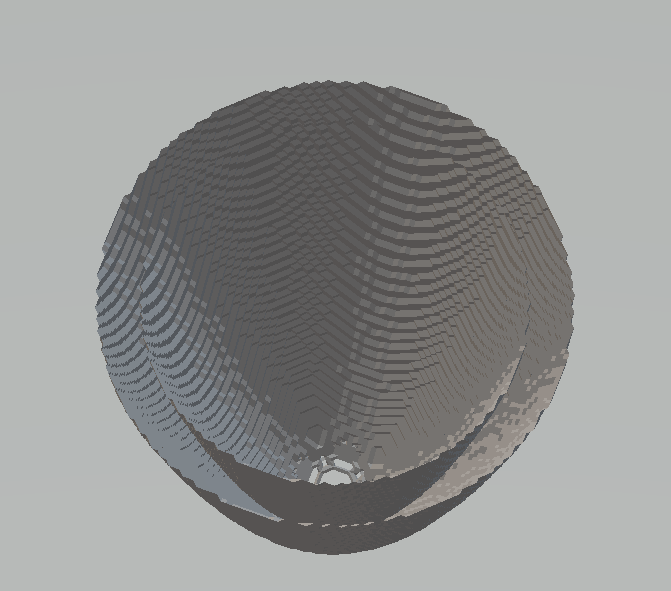